In [2]:
import numpy as np
import scipy.stats as s
import pandas as pd

In [3]:
raw_data = pd.read_csv("../DataSets/binianmalignent.csv")

In [4]:
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
raw_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
raw_data.drop(labels=[raw_data.columns[0],raw_data.columns[32]],axis=1,inplace=True)

In [7]:
raw_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
raw_data['diagnosis'].replace(to_replace=['B','M'],value=[0,1],inplace=True)

In [9]:
raw_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
C = raw_data['diagnosis']

In [11]:
C

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
539    0
540    0
541    0
542    0
543    0
544    0
545    0
546    0
547    0
548    0
549    0
550    0
551    0
552    0
553    0
554    0
555    0
556    0
557    0
558    0
559    0
560    0
561    0
562    1
563    1
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [12]:
training_data = raw_data.iloc[0:int(0.75*raw_data.shape[0])]

In [13]:
testing_data = raw_data.iloc[int(0.75*raw_data.shape[0]):]

In [14]:
training_data.drop(['diagnosis'],axis=1,inplace=True)

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [15]:
training_data['bias'] = np.ones((training_data.shape[0],1))

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
training_data.shape

(426, 31)

In [20]:
C_train = C[0:int(0.75*raw_data.shape[0])]

In [21]:
C_test = C[int(0.75*raw_data.shape[0]):]

In [22]:
C_train = np.array(C_train)

In [23]:
C_test = np.array(C_test)

In [24]:
def sigmoid(previous_activation,current_thetas):
    
    dot_product = np.matmul(previous_activation,current_thetas)
    
    return 1/(1+np.exp(-dot_product))

In [25]:
neurons = [31,31,31,1]

In [26]:
l1_thetas_old = np.random.randn(neurons[0],neurons[1])

l2_thetas_old = np.random.randn(neurons[1],neurons[2])

l3_thetas_old = np.random.randn(neurons[2],neurons[3])

In [57]:
alpha = 0.001

epsilon = 0.0001

i = 0

batch_size = 32

neg_log_likeli_history = [0]

iterations = [0]

while(i<5000):
    
    index = np.random.randint(0,training_data.shape[0],size=(32,))
    
    l0_activation = np.array(training_data.iloc[index])
    
    l1_activation = sigmoid(l0_activation,l1_thetas_old)
    
    del1_forward = np.matmul(l0_activation.T,(l1_activation*(1-l1_activation))) 
    
    l2_activation = sigmoid(l1_activation,l2_thetas_old)
    
    del2_forward = np.matmul(l1_activation.T,(l2_activation*(1-l2_activation)))
    
    l3_activation = sigmoid(l2_activation,l3_thetas_old)
    
    del3_forward = np.matmul(l2_activation.T,(l3_activation*(1-l3_activation)))
    
    
    
    
    E = np.mean(l3_activation - C_train[index])
    
    del2_reverse = E*l3_thetas_old
    
    del1_reverse = np.matmul(l2_thetas_old,del2_reverse)
    
    
    
    
    l1_thetas_new = l1_thetas_old - alpha*(del1_forward*del1_reverse.T)
    
    l2_thetas_new = l2_thetas_old - alpha*(del2_forward*del2_reverse.T)
    
    l3_thetas_new = l3_thetas_old - alpha*(del3_forward*E)
    
    
    
    
    neg_log_likeli_old = -(np.matmul(C_train[index].T,np.log(l3_activation)) + np.matmul((1-C_train[index]).T,np.log(1-l3_activation)))
    
    neg_log_likeli_history.append(neg_log_likeli_old)
    
    i+=1
    
    iterations.append(i)
    
        
        
        
    l1_thetas_old = l1_thetas_new
    
    l2_thetas_old = l2_thetas_new
    
    l3_thetas_old = l3_thetas_new
    
    print("The value of Avg Negative Log Likelihood Loss at iteration # {} is {}".format(iterations[i],neg_log_likeli_history[i]))

The value of Avg Negative Log Likelihood Loss at iteration # 1 is [20.81774496]
The value of Avg Negative Log Likelihood Loss at iteration # 2 is [20.39091482]
The value of Avg Negative Log Likelihood Loss at iteration # 3 is [21.06411106]
The value of Avg Negative Log Likelihood Loss at iteration # 4 is [21.57635669]
The value of Avg Negative Log Likelihood Loss at iteration # 5 is [22.1052633]
The value of Avg Negative Log Likelihood Loss at iteration # 6 is [20.30428656]
The value of Avg Negative Log Likelihood Loss at iteration # 7 is [20.47652939]
The value of Avg Negative Log Likelihood Loss at iteration # 8 is [21.41055848]
The value of Avg Negative Log Likelihood Loss at iteration # 9 is [22.4412783]
The value of Avg Negative Log Likelihood Loss at iteration # 10 is [22.15716981]
The value of Avg Negative Log Likelihood Loss at iteration # 11 is [20.55179315]
The value of Avg Negative Log Likelihood Loss at iteration # 12 is [20.21490713]
The value of Avg Negative Log Likelihoo

The value of Avg Negative Log Likelihood Loss at iteration # 104 is [22.12790379]
The value of Avg Negative Log Likelihood Loss at iteration # 105 is [20.6096591]
The value of Avg Negative Log Likelihood Loss at iteration # 106 is [20.66046829]
The value of Avg Negative Log Likelihood Loss at iteration # 107 is [22.41372803]
The value of Avg Negative Log Likelihood Loss at iteration # 108 is [21.24031609]
The value of Avg Negative Log Likelihood Loss at iteration # 109 is [21.40893124]
The value of Avg Negative Log Likelihood Loss at iteration # 110 is [21.20273528]
The value of Avg Negative Log Likelihood Loss at iteration # 111 is [21.61515861]
The value of Avg Negative Log Likelihood Loss at iteration # 112 is [21.79630188]
The value of Avg Negative Log Likelihood Loss at iteration # 113 is [21.99148243]
The value of Avg Negative Log Likelihood Loss at iteration # 114 is [21.41005118]
The value of Avg Negative Log Likelihood Loss at iteration # 115 is [20.63576979]
The value of Avg 

The value of Avg Negative Log Likelihood Loss at iteration # 320 is [20.1740449]
The value of Avg Negative Log Likelihood Loss at iteration # 321 is [22.22163942]
The value of Avg Negative Log Likelihood Loss at iteration # 322 is [21.01221584]
The value of Avg Negative Log Likelihood Loss at iteration # 323 is [22.77350938]
The value of Avg Negative Log Likelihood Loss at iteration # 324 is [22.28544766]
The value of Avg Negative Log Likelihood Loss at iteration # 325 is [21.87165978]
The value of Avg Negative Log Likelihood Loss at iteration # 326 is [22.37610942]
The value of Avg Negative Log Likelihood Loss at iteration # 327 is [22.84936986]
The value of Avg Negative Log Likelihood Loss at iteration # 328 is [21.15177162]
The value of Avg Negative Log Likelihood Loss at iteration # 329 is [21.33309103]
The value of Avg Negative Log Likelihood Loss at iteration # 330 is [21.31409835]
The value of Avg Negative Log Likelihood Loss at iteration # 331 is [22.33260182]
The value of Avg 

The value of Avg Negative Log Likelihood Loss at iteration # 422 is [21.61612909]
The value of Avg Negative Log Likelihood Loss at iteration # 423 is [21.17563199]
The value of Avg Negative Log Likelihood Loss at iteration # 424 is [21.40700346]
The value of Avg Negative Log Likelihood Loss at iteration # 425 is [22.95886976]
The value of Avg Negative Log Likelihood Loss at iteration # 426 is [21.2764314]
The value of Avg Negative Log Likelihood Loss at iteration # 427 is [21.76993468]
The value of Avg Negative Log Likelihood Loss at iteration # 428 is [21.90934516]
The value of Avg Negative Log Likelihood Loss at iteration # 429 is [20.88882101]
The value of Avg Negative Log Likelihood Loss at iteration # 430 is [20.82298009]
The value of Avg Negative Log Likelihood Loss at iteration # 431 is [21.76865224]
The value of Avg Negative Log Likelihood Loss at iteration # 432 is [22.25552219]
The value of Avg Negative Log Likelihood Loss at iteration # 433 is [20.35306498]
The value of Avg 

The value of Avg Negative Log Likelihood Loss at iteration # 527 is [20.55821503]
The value of Avg Negative Log Likelihood Loss at iteration # 528 is [20.07674335]
The value of Avg Negative Log Likelihood Loss at iteration # 529 is [23.67010529]
The value of Avg Negative Log Likelihood Loss at iteration # 530 is [21.26618577]
The value of Avg Negative Log Likelihood Loss at iteration # 531 is [20.51958288]
The value of Avg Negative Log Likelihood Loss at iteration # 532 is [20.60501527]
The value of Avg Negative Log Likelihood Loss at iteration # 533 is [20.56441912]
The value of Avg Negative Log Likelihood Loss at iteration # 534 is [23.19106368]
The value of Avg Negative Log Likelihood Loss at iteration # 535 is [20.63810843]
The value of Avg Negative Log Likelihood Loss at iteration # 536 is [22.00870535]
The value of Avg Negative Log Likelihood Loss at iteration # 537 is [23.29387678]
The value of Avg Negative Log Likelihood Loss at iteration # 538 is [21.74692128]
The value of Avg

The value of Avg Negative Log Likelihood Loss at iteration # 725 is [21.61538803]
The value of Avg Negative Log Likelihood Loss at iteration # 726 is [21.58161349]
The value of Avg Negative Log Likelihood Loss at iteration # 727 is [21.70172923]
The value of Avg Negative Log Likelihood Loss at iteration # 728 is [22.46617469]
The value of Avg Negative Log Likelihood Loss at iteration # 729 is [22.3028434]
The value of Avg Negative Log Likelihood Loss at iteration # 730 is [21.93450491]
The value of Avg Negative Log Likelihood Loss at iteration # 731 is [23.16744571]
The value of Avg Negative Log Likelihood Loss at iteration # 732 is [21.13238701]
The value of Avg Negative Log Likelihood Loss at iteration # 733 is [21.78244514]
The value of Avg Negative Log Likelihood Loss at iteration # 734 is [21.69915179]
The value of Avg Negative Log Likelihood Loss at iteration # 735 is [22.17558422]
The value of Avg Negative Log Likelihood Loss at iteration # 736 is [22.07599543]
The value of Avg 

The value of Avg Negative Log Likelihood Loss at iteration # 909 is [19.9451267]
The value of Avg Negative Log Likelihood Loss at iteration # 910 is [22.25425849]
The value of Avg Negative Log Likelihood Loss at iteration # 911 is [19.84997483]
The value of Avg Negative Log Likelihood Loss at iteration # 912 is [22.05433319]
The value of Avg Negative Log Likelihood Loss at iteration # 913 is [21.18630398]
The value of Avg Negative Log Likelihood Loss at iteration # 914 is [20.77827273]
The value of Avg Negative Log Likelihood Loss at iteration # 915 is [20.96937524]
The value of Avg Negative Log Likelihood Loss at iteration # 916 is [20.75730866]
The value of Avg Negative Log Likelihood Loss at iteration # 917 is [22.86511568]
The value of Avg Negative Log Likelihood Loss at iteration # 918 is [20.86756829]
The value of Avg Negative Log Likelihood Loss at iteration # 919 is [21.1813898]
The value of Avg Negative Log Likelihood Loss at iteration # 920 is [20.62523475]
The value of Avg N

The value of Avg Negative Log Likelihood Loss at iteration # 1011 is [24.0222235]
The value of Avg Negative Log Likelihood Loss at iteration # 1012 is [22.12798317]
The value of Avg Negative Log Likelihood Loss at iteration # 1013 is [22.63363222]
The value of Avg Negative Log Likelihood Loss at iteration # 1014 is [22.3624949]
The value of Avg Negative Log Likelihood Loss at iteration # 1015 is [21.16240286]
The value of Avg Negative Log Likelihood Loss at iteration # 1016 is [21.68531399]
The value of Avg Negative Log Likelihood Loss at iteration # 1017 is [21.03478611]
The value of Avg Negative Log Likelihood Loss at iteration # 1018 is [22.24318928]
The value of Avg Negative Log Likelihood Loss at iteration # 1019 is [21.46270189]
The value of Avg Negative Log Likelihood Loss at iteration # 1020 is [21.6539762]
The value of Avg Negative Log Likelihood Loss at iteration # 1021 is [20.78343988]
The value of Avg Negative Log Likelihood Loss at iteration # 1022 is [20.67117386]
The val

The value of Avg Negative Log Likelihood Loss at iteration # 1115 is [22.31817056]
The value of Avg Negative Log Likelihood Loss at iteration # 1116 is [20.96146953]
The value of Avg Negative Log Likelihood Loss at iteration # 1117 is [21.40239304]
The value of Avg Negative Log Likelihood Loss at iteration # 1118 is [22.02012765]
The value of Avg Negative Log Likelihood Loss at iteration # 1119 is [21.94536165]
The value of Avg Negative Log Likelihood Loss at iteration # 1120 is [21.76369762]
The value of Avg Negative Log Likelihood Loss at iteration # 1121 is [23.16467206]
The value of Avg Negative Log Likelihood Loss at iteration # 1122 is [20.03341201]
The value of Avg Negative Log Likelihood Loss at iteration # 1123 is [20.55754968]
The value of Avg Negative Log Likelihood Loss at iteration # 1124 is [19.79817523]
The value of Avg Negative Log Likelihood Loss at iteration # 1125 is [19.71533112]
The value of Avg Negative Log Likelihood Loss at iteration # 1126 is [20.26484841]
The 

The value of Avg Negative Log Likelihood Loss at iteration # 1316 is [22.60152532]
The value of Avg Negative Log Likelihood Loss at iteration # 1317 is [20.9715621]
The value of Avg Negative Log Likelihood Loss at iteration # 1318 is [22.49855066]
The value of Avg Negative Log Likelihood Loss at iteration # 1319 is [19.38460414]
The value of Avg Negative Log Likelihood Loss at iteration # 1320 is [21.41864957]
The value of Avg Negative Log Likelihood Loss at iteration # 1321 is [20.32347644]
The value of Avg Negative Log Likelihood Loss at iteration # 1322 is [20.13095541]
The value of Avg Negative Log Likelihood Loss at iteration # 1323 is [20.53217993]
The value of Avg Negative Log Likelihood Loss at iteration # 1324 is [22.11635354]
The value of Avg Negative Log Likelihood Loss at iteration # 1325 is [20.958473]
The value of Avg Negative Log Likelihood Loss at iteration # 1326 is [21.41243333]
The value of Avg Negative Log Likelihood Loss at iteration # 1327 is [21.40994107]
The val

The value of Avg Negative Log Likelihood Loss at iteration # 1421 is [21.43205834]
The value of Avg Negative Log Likelihood Loss at iteration # 1422 is [21.93172554]
The value of Avg Negative Log Likelihood Loss at iteration # 1423 is [21.72736534]
The value of Avg Negative Log Likelihood Loss at iteration # 1424 is [20.9187805]
The value of Avg Negative Log Likelihood Loss at iteration # 1425 is [21.12654459]
The value of Avg Negative Log Likelihood Loss at iteration # 1426 is [22.27180249]
The value of Avg Negative Log Likelihood Loss at iteration # 1427 is [21.12390723]
The value of Avg Negative Log Likelihood Loss at iteration # 1428 is [20.76947105]
The value of Avg Negative Log Likelihood Loss at iteration # 1429 is [21.96982825]
The value of Avg Negative Log Likelihood Loss at iteration # 1430 is [20.72069227]
The value of Avg Negative Log Likelihood Loss at iteration # 1431 is [20.2891545]
The value of Avg Negative Log Likelihood Loss at iteration # 1432 is [20.77073045]
The va

The value of Avg Negative Log Likelihood Loss at iteration # 1521 is [20.07581766]
The value of Avg Negative Log Likelihood Loss at iteration # 1522 is [22.23572115]
The value of Avg Negative Log Likelihood Loss at iteration # 1523 is [22.13672279]
The value of Avg Negative Log Likelihood Loss at iteration # 1524 is [22.34262949]
The value of Avg Negative Log Likelihood Loss at iteration # 1525 is [22.77453712]
The value of Avg Negative Log Likelihood Loss at iteration # 1526 is [22.03179216]
The value of Avg Negative Log Likelihood Loss at iteration # 1527 is [21.0742097]
The value of Avg Negative Log Likelihood Loss at iteration # 1528 is [20.52940782]
The value of Avg Negative Log Likelihood Loss at iteration # 1529 is [21.40704719]
The value of Avg Negative Log Likelihood Loss at iteration # 1530 is [21.61996408]
The value of Avg Negative Log Likelihood Loss at iteration # 1531 is [20.49579945]
The value of Avg Negative Log Likelihood Loss at iteration # 1532 is [25.13578334]
The v

The value of Avg Negative Log Likelihood Loss at iteration # 1722 is [21.63708434]
The value of Avg Negative Log Likelihood Loss at iteration # 1723 is [19.86814141]
The value of Avg Negative Log Likelihood Loss at iteration # 1724 is [22.44852401]
The value of Avg Negative Log Likelihood Loss at iteration # 1725 is [20.9569839]
The value of Avg Negative Log Likelihood Loss at iteration # 1726 is [20.896915]
The value of Avg Negative Log Likelihood Loss at iteration # 1727 is [21.61494379]
The value of Avg Negative Log Likelihood Loss at iteration # 1728 is [22.5433537]
The value of Avg Negative Log Likelihood Loss at iteration # 1729 is [20.83102602]
The value of Avg Negative Log Likelihood Loss at iteration # 1730 is [21.0286522]
The value of Avg Negative Log Likelihood Loss at iteration # 1731 is [22.31169732]
The value of Avg Negative Log Likelihood Loss at iteration # 1732 is [20.92103234]
The value of Avg Negative Log Likelihood Loss at iteration # 1733 is [21.61498461]
The value

The value of Avg Negative Log Likelihood Loss at iteration # 1828 is [20.45021524]
The value of Avg Negative Log Likelihood Loss at iteration # 1829 is [21.53845134]
The value of Avg Negative Log Likelihood Loss at iteration # 1830 is [21.17696307]
The value of Avg Negative Log Likelihood Loss at iteration # 1831 is [21.75679677]
The value of Avg Negative Log Likelihood Loss at iteration # 1832 is [22.67541981]
The value of Avg Negative Log Likelihood Loss at iteration # 1833 is [22.1961201]
The value of Avg Negative Log Likelihood Loss at iteration # 1834 is [22.10208328]
The value of Avg Negative Log Likelihood Loss at iteration # 1835 is [21.45198084]
The value of Avg Negative Log Likelihood Loss at iteration # 1836 is [21.0902375]
The value of Avg Negative Log Likelihood Loss at iteration # 1837 is [21.14076845]
The value of Avg Negative Log Likelihood Loss at iteration # 1838 is [20.86015313]
The value of Avg Negative Log Likelihood Loss at iteration # 1839 is [21.61861091]
The va

The value of Avg Negative Log Likelihood Loss at iteration # 1939 is [21.39811639]
The value of Avg Negative Log Likelihood Loss at iteration # 1940 is [19.84585697]
The value of Avg Negative Log Likelihood Loss at iteration # 1941 is [23.7643016]
The value of Avg Negative Log Likelihood Loss at iteration # 1942 is [23.20548106]
The value of Avg Negative Log Likelihood Loss at iteration # 1943 is [22.45431137]
The value of Avg Negative Log Likelihood Loss at iteration # 1944 is [21.5166721]
The value of Avg Negative Log Likelihood Loss at iteration # 1945 is [22.46977598]
The value of Avg Negative Log Likelihood Loss at iteration # 1946 is [20.66864173]
The value of Avg Negative Log Likelihood Loss at iteration # 1947 is [21.96415409]
The value of Avg Negative Log Likelihood Loss at iteration # 1948 is [21.25746778]
The value of Avg Negative Log Likelihood Loss at iteration # 1949 is [21.81103779]
The value of Avg Negative Log Likelihood Loss at iteration # 1950 is [21.22450713]
The va

The value of Avg Negative Log Likelihood Loss at iteration # 2040 is [20.02514693]
The value of Avg Negative Log Likelihood Loss at iteration # 2041 is [21.38987361]
The value of Avg Negative Log Likelihood Loss at iteration # 2042 is [23.34676627]
The value of Avg Negative Log Likelihood Loss at iteration # 2043 is [21.73658114]
The value of Avg Negative Log Likelihood Loss at iteration # 2044 is [22.42016698]
The value of Avg Negative Log Likelihood Loss at iteration # 2045 is [21.54661467]
The value of Avg Negative Log Likelihood Loss at iteration # 2046 is [21.77744486]
The value of Avg Negative Log Likelihood Loss at iteration # 2047 is [21.67293386]
The value of Avg Negative Log Likelihood Loss at iteration # 2048 is [20.43726774]
The value of Avg Negative Log Likelihood Loss at iteration # 2049 is [22.45507201]
The value of Avg Negative Log Likelihood Loss at iteration # 2050 is [20.82448367]
The value of Avg Negative Log Likelihood Loss at iteration # 2051 is [22.37150937]
The 

The value of Avg Negative Log Likelihood Loss at iteration # 2146 is [23.1948128]
The value of Avg Negative Log Likelihood Loss at iteration # 2147 is [21.74610357]
The value of Avg Negative Log Likelihood Loss at iteration # 2148 is [20.71817774]
The value of Avg Negative Log Likelihood Loss at iteration # 2149 is [19.32759914]
The value of Avg Negative Log Likelihood Loss at iteration # 2150 is [21.35837608]
The value of Avg Negative Log Likelihood Loss at iteration # 2151 is [19.74585529]
The value of Avg Negative Log Likelihood Loss at iteration # 2152 is [19.79381513]
The value of Avg Negative Log Likelihood Loss at iteration # 2153 is [21.9077731]
The value of Avg Negative Log Likelihood Loss at iteration # 2154 is [23.04502544]
The value of Avg Negative Log Likelihood Loss at iteration # 2155 is [23.29462227]
The value of Avg Negative Log Likelihood Loss at iteration # 2156 is [20.42705682]
The value of Avg Negative Log Likelihood Loss at iteration # 2157 is [21.95380139]
The va

The value of Avg Negative Log Likelihood Loss at iteration # 2249 is [21.29436026]
The value of Avg Negative Log Likelihood Loss at iteration # 2250 is [20.99280141]
The value of Avg Negative Log Likelihood Loss at iteration # 2251 is [20.51961103]
The value of Avg Negative Log Likelihood Loss at iteration # 2252 is [20.21151866]
The value of Avg Negative Log Likelihood Loss at iteration # 2253 is [20.86238842]
The value of Avg Negative Log Likelihood Loss at iteration # 2254 is [22.58545742]
The value of Avg Negative Log Likelihood Loss at iteration # 2255 is [21.39214233]
The value of Avg Negative Log Likelihood Loss at iteration # 2256 is [20.88084568]
The value of Avg Negative Log Likelihood Loss at iteration # 2257 is [22.17016393]
The value of Avg Negative Log Likelihood Loss at iteration # 2258 is [21.61532463]
The value of Avg Negative Log Likelihood Loss at iteration # 2259 is [21.9847874]
The value of Avg Negative Log Likelihood Loss at iteration # 2260 is [20.31612444]
The v

The value of Avg Negative Log Likelihood Loss at iteration # 2353 is [21.93801791]
The value of Avg Negative Log Likelihood Loss at iteration # 2354 is [21.05570734]
The value of Avg Negative Log Likelihood Loss at iteration # 2355 is [21.80901335]
The value of Avg Negative Log Likelihood Loss at iteration # 2356 is [21.72013361]
The value of Avg Negative Log Likelihood Loss at iteration # 2357 is [20.21105248]
The value of Avg Negative Log Likelihood Loss at iteration # 2358 is [23.02611784]
The value of Avg Negative Log Likelihood Loss at iteration # 2359 is [23.18085858]
The value of Avg Negative Log Likelihood Loss at iteration # 2360 is [20.94156984]
The value of Avg Negative Log Likelihood Loss at iteration # 2361 is [23.11087028]
The value of Avg Negative Log Likelihood Loss at iteration # 2362 is [21.44145941]
The value of Avg Negative Log Likelihood Loss at iteration # 2363 is [21.2772549]
The value of Avg Negative Log Likelihood Loss at iteration # 2364 is [20.68447734]
The v

The value of Avg Negative Log Likelihood Loss at iteration # 2457 is [20.86498369]
The value of Avg Negative Log Likelihood Loss at iteration # 2458 is [20.3797543]
The value of Avg Negative Log Likelihood Loss at iteration # 2459 is [22.34173794]
The value of Avg Negative Log Likelihood Loss at iteration # 2460 is [19.86841282]
The value of Avg Negative Log Likelihood Loss at iteration # 2461 is [21.53528581]
The value of Avg Negative Log Likelihood Loss at iteration # 2462 is [21.25088297]
The value of Avg Negative Log Likelihood Loss at iteration # 2463 is [22.89723041]
The value of Avg Negative Log Likelihood Loss at iteration # 2464 is [21.0677099]
The value of Avg Negative Log Likelihood Loss at iteration # 2465 is [20.47067773]
The value of Avg Negative Log Likelihood Loss at iteration # 2466 is [21.70944021]
The value of Avg Negative Log Likelihood Loss at iteration # 2467 is [21.79311079]
The value of Avg Negative Log Likelihood Loss at iteration # 2468 is [21.17117252]
The va

The value of Avg Negative Log Likelihood Loss at iteration # 2557 is [21.39037303]
The value of Avg Negative Log Likelihood Loss at iteration # 2558 is [20.49738631]
The value of Avg Negative Log Likelihood Loss at iteration # 2559 is [21.19103891]
The value of Avg Negative Log Likelihood Loss at iteration # 2560 is [22.27956811]
The value of Avg Negative Log Likelihood Loss at iteration # 2561 is [20.78803245]
The value of Avg Negative Log Likelihood Loss at iteration # 2562 is [20.08655043]
The value of Avg Negative Log Likelihood Loss at iteration # 2563 is [19.80465321]
The value of Avg Negative Log Likelihood Loss at iteration # 2564 is [21.46233498]
The value of Avg Negative Log Likelihood Loss at iteration # 2565 is [20.69472771]
The value of Avg Negative Log Likelihood Loss at iteration # 2566 is [19.24765598]
The value of Avg Negative Log Likelihood Loss at iteration # 2567 is [21.47280672]
The value of Avg Negative Log Likelihood Loss at iteration # 2568 is [20.94162955]
The 

The value of Avg Negative Log Likelihood Loss at iteration # 2658 is [21.89853173]
The value of Avg Negative Log Likelihood Loss at iteration # 2659 is [20.63236175]
The value of Avg Negative Log Likelihood Loss at iteration # 2660 is [21.65361389]
The value of Avg Negative Log Likelihood Loss at iteration # 2661 is [21.28382832]
The value of Avg Negative Log Likelihood Loss at iteration # 2662 is [21.81039068]
The value of Avg Negative Log Likelihood Loss at iteration # 2663 is [21.22489363]
The value of Avg Negative Log Likelihood Loss at iteration # 2664 is [22.36409646]
The value of Avg Negative Log Likelihood Loss at iteration # 2665 is [21.2114831]
The value of Avg Negative Log Likelihood Loss at iteration # 2666 is [21.54267439]
The value of Avg Negative Log Likelihood Loss at iteration # 2667 is [21.5618029]
The value of Avg Negative Log Likelihood Loss at iteration # 2668 is [21.66449605]
The value of Avg Negative Log Likelihood Loss at iteration # 2669 is [20.94807112]
The va

The value of Avg Negative Log Likelihood Loss at iteration # 2762 is [20.95767929]
The value of Avg Negative Log Likelihood Loss at iteration # 2763 is [20.43819252]
The value of Avg Negative Log Likelihood Loss at iteration # 2764 is [18.79794502]
The value of Avg Negative Log Likelihood Loss at iteration # 2765 is [20.94811974]
The value of Avg Negative Log Likelihood Loss at iteration # 2766 is [20.49249348]
The value of Avg Negative Log Likelihood Loss at iteration # 2767 is [20.70781947]
The value of Avg Negative Log Likelihood Loss at iteration # 2768 is [20.68936588]
The value of Avg Negative Log Likelihood Loss at iteration # 2769 is [22.16445101]
The value of Avg Negative Log Likelihood Loss at iteration # 2770 is [20.68983286]
The value of Avg Negative Log Likelihood Loss at iteration # 2771 is [22.13049309]
The value of Avg Negative Log Likelihood Loss at iteration # 2772 is [20.035946]
The value of Avg Negative Log Likelihood Loss at iteration # 2773 is [22.11973351]
The va

The value of Avg Negative Log Likelihood Loss at iteration # 2862 is [20.69692585]
The value of Avg Negative Log Likelihood Loss at iteration # 2863 is [21.19542921]
The value of Avg Negative Log Likelihood Loss at iteration # 2864 is [21.7212991]
The value of Avg Negative Log Likelihood Loss at iteration # 2865 is [21.1911383]
The value of Avg Negative Log Likelihood Loss at iteration # 2866 is [21.13732641]
The value of Avg Negative Log Likelihood Loss at iteration # 2867 is [19.73100898]
The value of Avg Negative Log Likelihood Loss at iteration # 2868 is [21.14872036]
The value of Avg Negative Log Likelihood Loss at iteration # 2869 is [20.19454602]
The value of Avg Negative Log Likelihood Loss at iteration # 2870 is [20.0770025]
The value of Avg Negative Log Likelihood Loss at iteration # 2871 is [23.646887]
The value of Avg Negative Log Likelihood Loss at iteration # 2872 is [21.30678572]
The value of Avg Negative Log Likelihood Loss at iteration # 2873 is [23.14099737]
The value

The value of Avg Negative Log Likelihood Loss at iteration # 2962 is [21.09330314]
The value of Avg Negative Log Likelihood Loss at iteration # 2963 is [21.45187849]
The value of Avg Negative Log Likelihood Loss at iteration # 2964 is [19.13189729]
The value of Avg Negative Log Likelihood Loss at iteration # 2965 is [21.7899023]
The value of Avg Negative Log Likelihood Loss at iteration # 2966 is [22.09832105]
The value of Avg Negative Log Likelihood Loss at iteration # 2967 is [20.65379068]
The value of Avg Negative Log Likelihood Loss at iteration # 2968 is [20.52036696]
The value of Avg Negative Log Likelihood Loss at iteration # 2969 is [22.99590608]
The value of Avg Negative Log Likelihood Loss at iteration # 2970 is [19.23691116]
The value of Avg Negative Log Likelihood Loss at iteration # 2971 is [21.81281722]
The value of Avg Negative Log Likelihood Loss at iteration # 2972 is [20.1380666]
The value of Avg Negative Log Likelihood Loss at iteration # 2973 is [25.20141519]
The va

The value of Avg Negative Log Likelihood Loss at iteration # 3066 is [20.42316306]
The value of Avg Negative Log Likelihood Loss at iteration # 3067 is [24.32283016]
The value of Avg Negative Log Likelihood Loss at iteration # 3068 is [20.50769873]
The value of Avg Negative Log Likelihood Loss at iteration # 3069 is [20.47382438]
The value of Avg Negative Log Likelihood Loss at iteration # 3070 is [22.49911722]
The value of Avg Negative Log Likelihood Loss at iteration # 3071 is [19.57921754]
The value of Avg Negative Log Likelihood Loss at iteration # 3072 is [20.79613577]
The value of Avg Negative Log Likelihood Loss at iteration # 3073 is [20.28468232]
The value of Avg Negative Log Likelihood Loss at iteration # 3074 is [21.44009317]
The value of Avg Negative Log Likelihood Loss at iteration # 3075 is [21.19018496]
The value of Avg Negative Log Likelihood Loss at iteration # 3076 is [20.74302427]
The value of Avg Negative Log Likelihood Loss at iteration # 3077 is [20.71880397]
The 

The value of Avg Negative Log Likelihood Loss at iteration # 3264 is [22.12967113]
The value of Avg Negative Log Likelihood Loss at iteration # 3265 is [21.38410979]
The value of Avg Negative Log Likelihood Loss at iteration # 3266 is [20.9157943]
The value of Avg Negative Log Likelihood Loss at iteration # 3267 is [19.56466468]
The value of Avg Negative Log Likelihood Loss at iteration # 3268 is [22.16200225]
The value of Avg Negative Log Likelihood Loss at iteration # 3269 is [21.76609942]
The value of Avg Negative Log Likelihood Loss at iteration # 3270 is [20.38638577]
The value of Avg Negative Log Likelihood Loss at iteration # 3271 is [21.70385314]
The value of Avg Negative Log Likelihood Loss at iteration # 3272 is [23.28873966]
The value of Avg Negative Log Likelihood Loss at iteration # 3273 is [23.12818199]
The value of Avg Negative Log Likelihood Loss at iteration # 3274 is [22.04776976]
The value of Avg Negative Log Likelihood Loss at iteration # 3275 is [21.002777]
The val

The value of Avg Negative Log Likelihood Loss at iteration # 3369 is [23.37399253]
The value of Avg Negative Log Likelihood Loss at iteration # 3370 is [21.09712602]
The value of Avg Negative Log Likelihood Loss at iteration # 3371 is [22.02503625]
The value of Avg Negative Log Likelihood Loss at iteration # 3372 is [21.80850954]
The value of Avg Negative Log Likelihood Loss at iteration # 3373 is [22.38100552]
The value of Avg Negative Log Likelihood Loss at iteration # 3374 is [22.01057911]
The value of Avg Negative Log Likelihood Loss at iteration # 3375 is [21.28389004]
The value of Avg Negative Log Likelihood Loss at iteration # 3376 is [21.48446966]
The value of Avg Negative Log Likelihood Loss at iteration # 3377 is [21.73746345]
The value of Avg Negative Log Likelihood Loss at iteration # 3378 is [21.51150334]
The value of Avg Negative Log Likelihood Loss at iteration # 3379 is [22.66322723]
The value of Avg Negative Log Likelihood Loss at iteration # 3380 is [20.64937217]
The 

The value of Avg Negative Log Likelihood Loss at iteration # 3472 is [22.30045243]
The value of Avg Negative Log Likelihood Loss at iteration # 3473 is [21.08034111]
The value of Avg Negative Log Likelihood Loss at iteration # 3474 is [21.59486665]
The value of Avg Negative Log Likelihood Loss at iteration # 3475 is [20.75460133]
The value of Avg Negative Log Likelihood Loss at iteration # 3476 is [22.36755177]
The value of Avg Negative Log Likelihood Loss at iteration # 3477 is [22.71604146]
The value of Avg Negative Log Likelihood Loss at iteration # 3478 is [21.16961118]
The value of Avg Negative Log Likelihood Loss at iteration # 3479 is [19.46972277]
The value of Avg Negative Log Likelihood Loss at iteration # 3480 is [21.7442218]
The value of Avg Negative Log Likelihood Loss at iteration # 3481 is [22.21570566]
The value of Avg Negative Log Likelihood Loss at iteration # 3482 is [23.35885651]
The value of Avg Negative Log Likelihood Loss at iteration # 3483 is [21.17921456]
The v

The value of Avg Negative Log Likelihood Loss at iteration # 3577 is [21.75634869]
The value of Avg Negative Log Likelihood Loss at iteration # 3578 is [22.86370399]
The value of Avg Negative Log Likelihood Loss at iteration # 3579 is [21.4863652]
The value of Avg Negative Log Likelihood Loss at iteration # 3580 is [22.6916953]
The value of Avg Negative Log Likelihood Loss at iteration # 3581 is [20.50742386]
The value of Avg Negative Log Likelihood Loss at iteration # 3582 is [21.75334855]
The value of Avg Negative Log Likelihood Loss at iteration # 3583 is [20.54113422]
The value of Avg Negative Log Likelihood Loss at iteration # 3584 is [21.07617584]
The value of Avg Negative Log Likelihood Loss at iteration # 3585 is [21.49074173]
The value of Avg Negative Log Likelihood Loss at iteration # 3586 is [19.81145759]
The value of Avg Negative Log Likelihood Loss at iteration # 3587 is [20.21336382]
The value of Avg Negative Log Likelihood Loss at iteration # 3588 is [22.04252228]
The va

The value of Avg Negative Log Likelihood Loss at iteration # 3686 is [20.38510787]
The value of Avg Negative Log Likelihood Loss at iteration # 3687 is [22.01695792]
The value of Avg Negative Log Likelihood Loss at iteration # 3688 is [20.98635299]
The value of Avg Negative Log Likelihood Loss at iteration # 3689 is [22.17170214]
The value of Avg Negative Log Likelihood Loss at iteration # 3690 is [22.50385074]
The value of Avg Negative Log Likelihood Loss at iteration # 3691 is [21.61971377]
The value of Avg Negative Log Likelihood Loss at iteration # 3692 is [22.42444768]
The value of Avg Negative Log Likelihood Loss at iteration # 3693 is [21.04186379]
The value of Avg Negative Log Likelihood Loss at iteration # 3694 is [22.19192461]
The value of Avg Negative Log Likelihood Loss at iteration # 3695 is [21.23427242]
The value of Avg Negative Log Likelihood Loss at iteration # 3696 is [21.30410204]
The value of Avg Negative Log Likelihood Loss at iteration # 3697 is [20.92140693]
The 

The value of Avg Negative Log Likelihood Loss at iteration # 3791 is [21.01139907]
The value of Avg Negative Log Likelihood Loss at iteration # 3792 is [24.78886903]
The value of Avg Negative Log Likelihood Loss at iteration # 3793 is [22.21265514]
The value of Avg Negative Log Likelihood Loss at iteration # 3794 is [21.66523478]
The value of Avg Negative Log Likelihood Loss at iteration # 3795 is [20.3764915]
The value of Avg Negative Log Likelihood Loss at iteration # 3796 is [20.66427966]
The value of Avg Negative Log Likelihood Loss at iteration # 3797 is [21.73880409]
The value of Avg Negative Log Likelihood Loss at iteration # 3798 is [20.61105151]
The value of Avg Negative Log Likelihood Loss at iteration # 3799 is [22.6132952]
The value of Avg Negative Log Likelihood Loss at iteration # 3800 is [21.29794512]
The value of Avg Negative Log Likelihood Loss at iteration # 3801 is [21.96321388]
The value of Avg Negative Log Likelihood Loss at iteration # 3802 is [24.40444682]
The va

The value of Avg Negative Log Likelihood Loss at iteration # 3989 is [19.9224857]
The value of Avg Negative Log Likelihood Loss at iteration # 3990 is [23.01559439]
The value of Avg Negative Log Likelihood Loss at iteration # 3991 is [20.64597176]
The value of Avg Negative Log Likelihood Loss at iteration # 3992 is [22.54052176]
The value of Avg Negative Log Likelihood Loss at iteration # 3993 is [19.23925527]
The value of Avg Negative Log Likelihood Loss at iteration # 3994 is [20.94762278]
The value of Avg Negative Log Likelihood Loss at iteration # 3995 is [19.44972248]
The value of Avg Negative Log Likelihood Loss at iteration # 3996 is [20.23427827]
The value of Avg Negative Log Likelihood Loss at iteration # 3997 is [21.67203634]
The value of Avg Negative Log Likelihood Loss at iteration # 3998 is [21.14740341]
The value of Avg Negative Log Likelihood Loss at iteration # 3999 is [21.14352229]
The value of Avg Negative Log Likelihood Loss at iteration # 4000 is [22.13007781]
The v

The value of Avg Negative Log Likelihood Loss at iteration # 4090 is [22.16668789]
The value of Avg Negative Log Likelihood Loss at iteration # 4091 is [21.19448479]
The value of Avg Negative Log Likelihood Loss at iteration # 4092 is [21.06666734]
The value of Avg Negative Log Likelihood Loss at iteration # 4093 is [21.9617502]
The value of Avg Negative Log Likelihood Loss at iteration # 4094 is [21.27843461]
The value of Avg Negative Log Likelihood Loss at iteration # 4095 is [20.25369549]
The value of Avg Negative Log Likelihood Loss at iteration # 4096 is [20.59148405]
The value of Avg Negative Log Likelihood Loss at iteration # 4097 is [19.86511859]
The value of Avg Negative Log Likelihood Loss at iteration # 4098 is [21.12276406]
The value of Avg Negative Log Likelihood Loss at iteration # 4099 is [19.43556383]
The value of Avg Negative Log Likelihood Loss at iteration # 4100 is [21.3421289]
The value of Avg Negative Log Likelihood Loss at iteration # 4101 is [21.83150177]
The va

The value of Avg Negative Log Likelihood Loss at iteration # 4286 is [20.53613091]
The value of Avg Negative Log Likelihood Loss at iteration # 4287 is [21.36760396]
The value of Avg Negative Log Likelihood Loss at iteration # 4288 is [19.28941066]
The value of Avg Negative Log Likelihood Loss at iteration # 4289 is [18.53222981]
The value of Avg Negative Log Likelihood Loss at iteration # 4290 is [19.35964203]
The value of Avg Negative Log Likelihood Loss at iteration # 4291 is [21.17553806]
The value of Avg Negative Log Likelihood Loss at iteration # 4292 is [19.53642695]
The value of Avg Negative Log Likelihood Loss at iteration # 4293 is [24.09642789]
The value of Avg Negative Log Likelihood Loss at iteration # 4294 is [22.16530407]
The value of Avg Negative Log Likelihood Loss at iteration # 4295 is [19.54875522]
The value of Avg Negative Log Likelihood Loss at iteration # 4296 is [19.62718654]
The value of Avg Negative Log Likelihood Loss at iteration # 4297 is [20.63588815]
The 

The value of Avg Negative Log Likelihood Loss at iteration # 4467 is [21.22009075]
The value of Avg Negative Log Likelihood Loss at iteration # 4468 is [22.02127613]
The value of Avg Negative Log Likelihood Loss at iteration # 4469 is [21.97115081]
The value of Avg Negative Log Likelihood Loss at iteration # 4470 is [22.62875401]
The value of Avg Negative Log Likelihood Loss at iteration # 4471 is [22.25599406]
The value of Avg Negative Log Likelihood Loss at iteration # 4472 is [21.07915132]
The value of Avg Negative Log Likelihood Loss at iteration # 4473 is [22.73087715]
The value of Avg Negative Log Likelihood Loss at iteration # 4474 is [21.74731217]
The value of Avg Negative Log Likelihood Loss at iteration # 4475 is [21.57963095]
The value of Avg Negative Log Likelihood Loss at iteration # 4476 is [21.68613761]
The value of Avg Negative Log Likelihood Loss at iteration # 4477 is [21.10274035]
The value of Avg Negative Log Likelihood Loss at iteration # 4478 is [21.91304222]
The 

The value of Avg Negative Log Likelihood Loss at iteration # 4566 is [20.48252687]
The value of Avg Negative Log Likelihood Loss at iteration # 4567 is [19.62014294]
The value of Avg Negative Log Likelihood Loss at iteration # 4568 is [21.11823001]
The value of Avg Negative Log Likelihood Loss at iteration # 4569 is [22.08373037]
The value of Avg Negative Log Likelihood Loss at iteration # 4570 is [19.63913479]
The value of Avg Negative Log Likelihood Loss at iteration # 4571 is [20.40936102]
The value of Avg Negative Log Likelihood Loss at iteration # 4572 is [22.60952455]
The value of Avg Negative Log Likelihood Loss at iteration # 4573 is [20.75987874]
The value of Avg Negative Log Likelihood Loss at iteration # 4574 is [21.37590285]
The value of Avg Negative Log Likelihood Loss at iteration # 4575 is [21.5621815]
The value of Avg Negative Log Likelihood Loss at iteration # 4576 is [20.07441469]
The value of Avg Negative Log Likelihood Loss at iteration # 4577 is [21.84291932]
The v

The value of Avg Negative Log Likelihood Loss at iteration # 4762 is [22.33493767]
The value of Avg Negative Log Likelihood Loss at iteration # 4763 is [20.49517641]
The value of Avg Negative Log Likelihood Loss at iteration # 4764 is [21.37577915]
The value of Avg Negative Log Likelihood Loss at iteration # 4765 is [22.41206229]
The value of Avg Negative Log Likelihood Loss at iteration # 4766 is [20.51482472]
The value of Avg Negative Log Likelihood Loss at iteration # 4767 is [23.49708476]
The value of Avg Negative Log Likelihood Loss at iteration # 4768 is [22.54755543]
The value of Avg Negative Log Likelihood Loss at iteration # 4769 is [21.0473592]
The value of Avg Negative Log Likelihood Loss at iteration # 4770 is [21.98893697]
The value of Avg Negative Log Likelihood Loss at iteration # 4771 is [21.21573867]
The value of Avg Negative Log Likelihood Loss at iteration # 4772 is [21.36032481]
The value of Avg Negative Log Likelihood Loss at iteration # 4773 is [21.93026472]
The v

The value of Avg Negative Log Likelihood Loss at iteration # 4866 is [23.2763128]
The value of Avg Negative Log Likelihood Loss at iteration # 4867 is [21.60192077]
The value of Avg Negative Log Likelihood Loss at iteration # 4868 is [20.49349455]
The value of Avg Negative Log Likelihood Loss at iteration # 4869 is [21.90224967]
The value of Avg Negative Log Likelihood Loss at iteration # 4870 is [21.47020815]
The value of Avg Negative Log Likelihood Loss at iteration # 4871 is [20.22194103]
The value of Avg Negative Log Likelihood Loss at iteration # 4872 is [21.00299297]
The value of Avg Negative Log Likelihood Loss at iteration # 4873 is [21.61487312]
The value of Avg Negative Log Likelihood Loss at iteration # 4874 is [21.99317783]
The value of Avg Negative Log Likelihood Loss at iteration # 4875 is [24.05505008]
The value of Avg Negative Log Likelihood Loss at iteration # 4876 is [21.69634217]
The value of Avg Negative Log Likelihood Loss at iteration # 4877 is [21.37406195]
The v

In [28]:
import matplotlib.pyplot as plt

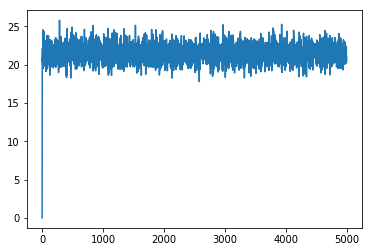

In [58]:
plt.plot(iterations,neg_log_likeli_history)

In [63]:
l0_activation = np.array(training_data)
    
l1_activation = sigmoid(l0_activation,l1_thetas_old)
l2_activation = sigmoid(l1_activation,l2_thetas_old)
    
l3_activation = sigmoid(l2_activation,l3_thetas_old)
l3_activation

array([[0.53122807],
       [0.41464681],
       [0.41464681],
       [0.41464681],
       [0.41464681],
       [0.41464681],
       [0.41464681],
       [0.41464681],
       [0.41464681],
       [0.41464681],
       [0.41464681],
       [0.41464681],
       [0.41464681],
       [0.41464681],
       [0.41464681],
       [0.41464681],
       [0.41464681],
       [0.41464681],
       [0.53122807],
       [0.41464681],
       [0.41464681],
       [0.41464681],
       [0.41464681],
       [0.53122807],
       [0.53122807],
       [0.41464681],
       [0.41464681],
       [0.41464681],
       [0.53122806],
       [0.41464681],
       [0.41464681],
       [0.53122807],
       [0.41464681],
       [0.41464681],
       [0.41464681],
       [0.41464681],
       [0.41464681],
       [0.41464681],
       [0.49678654],
       [0.41464681],
       [0.41464681],
       [0.41464681],
       [0.41464681],
       [0.41464697],
       [0.41464681],
       [0.41464681],
       [0.41464681],
       [0.414